In [2]:
import math
import matplotlib.pyplot as plt
#from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
import tensorflow as tf
import numpy as np
from TimeSeriesModule import seq2seq_window_dataset , model_forecast
keras= tf.keras
tf.random.set_seed(42)
np.random.seed(42)


# prepare the time series data :

In [13]:
sensor_data = pd.read_csv('/content/TVC_logger_ 3_betula.csv')

time = np.arange(107823)

humidity_series = pd.DataFrame(sensor_data['VWC.m3.per.m3.hummock'].values)
humidity_reads = np.array(sensor_data["VWC.m3.per.m3.hummock"])

split_ratio = int(len(time)*0.70)

time_train = time[:split_ratio]

x_train = humidity_reads[:split_ratio]

time_valid = time[split_ratio:]

x_valid = humidity_reads[split_ratio:]

# Map the data into x , y data

> Make sure that the functions was imported above.

> Make sure that the WaveNetModule in your directory






In [15]:

window_size = 32
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=164)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=164)


# load the wavenet model

> Make sure that the model is in your directory



In [16]:
model = keras.models.load_model("wavenetModel (1).h5")

In [17]:
cnn_forecast = model_forecast(model, humidity_series , window_size)
cnn_forecast = cnn_forecast[split_ratio - window_size:-1, -1, 0]

In [18]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast).numpy()

0.00019387263

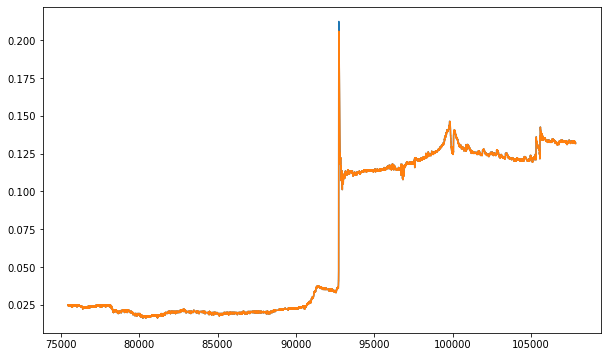

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, cnn_forecast)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, None, 32)          64        
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 32)          1056      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, None, 32)         